In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [23]:
df = pd.read_csv('D:/Git_hub_projects/Project-1_Data/Sample_TimeSeries.csv')

In [24]:
df

,Y
0,4110
1,16494
2,5177
3,23338
4,20698
...,...
409,24230
410,24804
411,22969
412,25379


In [25]:
arr = np.array(df['Y'])
thres = np.median(arr)
thres

24237.5

In [26]:
def interevent(arr, thres):
    time = []
    intertim = []
    for index, value in enumerate(arr):
      if value >= thres:
        time.append(index)
    for index, value in enumerate(time):
      if index+1 < len(time):
        thres = time[index+1] - value
        intertim.append(thres)
    return intertim

In [27]:
output = interevent(arr, thres)
print(output)


[4, 1, 6, 1, 5, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 4, 1, 2, 3, 1, 3, 4, 1, 6, 1, 6, 7, 1, 2, 4, 7, 7, 7, 4, 17, 7, 7, 14, 1, 13, 1, 6, 1, 4, 2, 1, 5, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 6, 1, 6, 1, 6, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2]


In [28]:
arr1 = np.array(df)

In [30]:
adj = np.zeros((len(arr1),len(arr1))).astype(int)

In [31]:
def hvg(arr1):
    for index1, value1 in enumerate(arr):
        current_max = -1
        for index2, value2 in enumerate(arr[index1+1:]):
            if (current_max < value2):
                adj[index1][index1+1+index2] = 1
                adj[index1+1+index2][index1] = 1
            current_max = max(current_max,value2)
            if (value1<=current_max):
                break
    return adj

In [32]:
adj = hvg(arr1)
print(adj)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [36]:
emp = pd.read_csv('D:/Git_hub_projects/Project-1_Data/EmploymentNational.csv')

In [38]:
emp['dateInt']=emp['year'].astype(str) + emp['month'].astype(str).str.zfill(2)+ emp['day_endofweek'].astype(str).str.zfill(2)
emp['Date'] = pd.to_datetime(emp['dateInt'], format='%Y%m%d')

In [82]:
emp

,year,month,day_endofweek,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,...,emp_s72,emp_retail_inclow,emp_retail_incmiddle,emp_retail_inchigh,emp_ss40,emp_ss60,emp_ss65,emp_ss70,dateInt,Date
0,2020,1,17,0.000735,0.00160,-0.000123,0.00227,-.00075,0.00103,0.000548,...,-0.000171,0.00190,0.000355,-.00503,0.000532,0.001390,0.000825,0.00001,20200117,2020-01-17
1,2020,1,24,0.000430,-0.00120,0.001970,0.00207,-.00226,0.00202,0.000735,...,0.001840,-0.00296,0.002230,-.00983,-0.000047,-0.000563,0.001410,0.00174,20200124,2020-01-24
2,2020,1,31,0.000269,-0.00344,0.003070,0.00121,-.00148,0.00218,0.000537,...,0.001530,-0.00830,0.001800,-.0039,-0.001050,-0.000952,0.003470,0.00198,20200131,2020-01-31
3,2020,2,7,0.000968,-0.00604,0.003560,0.00243,.00166,0.00302,-0.000179,...,0.001470,-0.01250,0.001100,.000422,-0.001420,0.000785,0.006220,0.00236,20200207,2020-02-07
4,2020,2,14,0.002150,-0.00794,0.001190,0.00680,.00624,0.00389,-0.002360,...,0.002540,-0.01080,0.001380,-.00213,-0.001480,0.002980,0.007850,0.00344,20200214,2020-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2022,11,18,-0.055500,-0.21100,-0.028200,0.00240,.,-0.01350,-0.099400,...,-0.184000,-0.21700,-0.047300,.,-0.063100,0.031200,-0.098500,-0.15900,20221118,2022-11-18
149,2022,11,25,-0.060500,-0.21500,-0.038200,0.00554,.,-0.01720,-0.107000,...,-0.188000,-0.22300,-0.049000,.,-0.065800,0.026800,-0.107000,-0.16400,20221125,2022-11-25
150,2022,12,2,-0.062200,-0.21700,-0.044000,0.01260,.,-0.01680,-0.111000,...,-0.193000,-0.23200,-0.049600,.,-0.068200,0.027600,-0.108000,-0.16700,20221202,2022-12-02
151,2022,12,9,-0.061900,-0.22000,-0.042400,0.01330,.,-0.01560,-0.112000,...,-0.193000,-0.24500,-0.049500,.,-0.069500,0.029800,-0.106000,-0.16800,20221209,2022-12-09


Text(0, 0.5, 'Percentage Change')

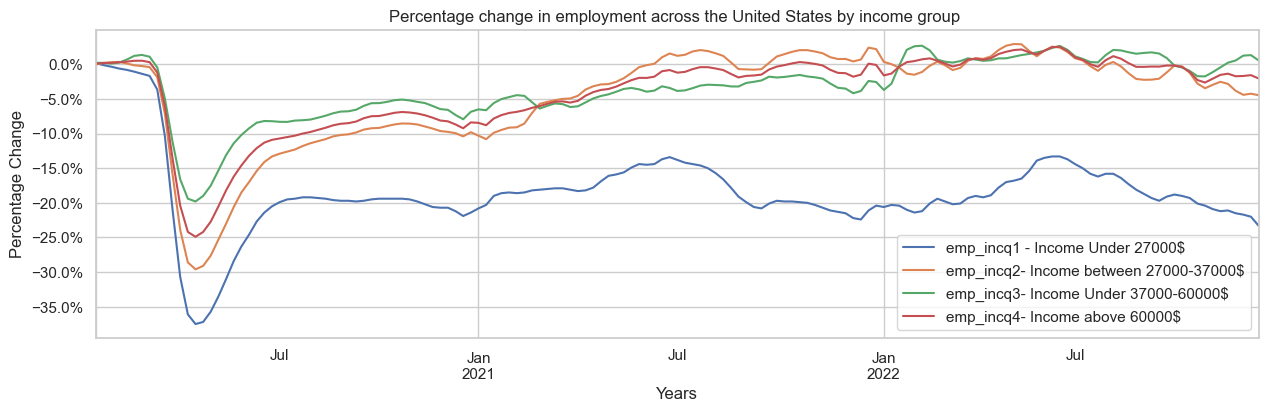

In [ ]:
emp.plot(x="Date", y=["emp_incq1", "emp_incq2","emp_incq3","emp_incq4","emp_incmiddle"],
        kind="line", figsize=(15, 4),grid=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.legend(labels=['emp_incq1 - Income Under 27000$', 'emp_incq2- Income between 27000-37000$', 'emp_incq3- Income Under 37000-60000$','emp_incq4- Income above 60000$','emp_incmiddle - Income between 27000-60000$'])
plt.title('Percentage change in employment across the United States by income group ')
plt.xlabel("Years")
plt.ylabel("Percentage Change")


In [111]:
house = pd.read_csv('D:/Git_hub_projects/Project-2_Data/MedianH.csv')

In [112]:
house

,Rank,MedianIncome,SchoolDis,Population
0,1,201200,Weston School District,"11,704"
1,2,176250,Dover School District,"5,727"
2,3,169505,Sudbury School District,"18,197"
3,4,165625,Dover-Sherborn School District,"9,927"
4,5,159615,Wellesley School District,"28,858"
...,...,...,...,...
304,305,34731,Springfield School District,"1,53,836"
305,306,34496,Lawrence School District,"77,364"
306,307,33763,Fall River School District,"88,756"
307,308,32083,North Adams School District in Monroe (9-12),118


Text(0.5, 1.0, 'Relative Frequency histogram of household income in Massachusetts by school districts')

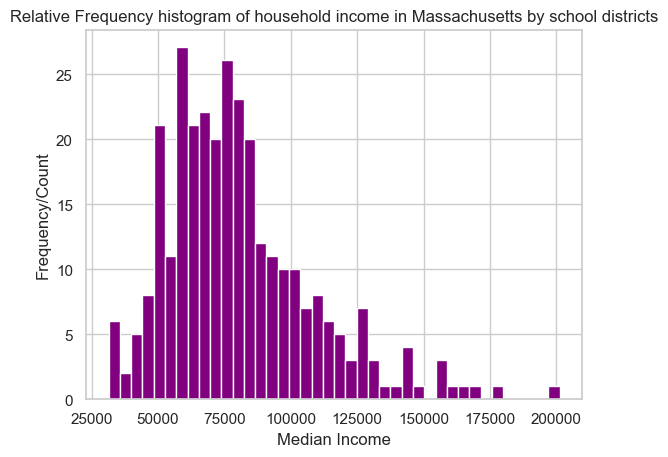

In [116]:
#histogram Block
draw = plt.figure()
axiss = draw.add_subplot(111)
axiss.hist(house['MedianIncome'],edgecolor= 'white', color='purple', weights=np.ones_like(house['MedianIncome'])+1/len(house['MedianIncome']), bins=40)
plt.xlabel('Median Income')
plt.ylabel('Frequency/Count')
plt.title('Relative Frequency histogram of household income in Massachusetts by school districts')

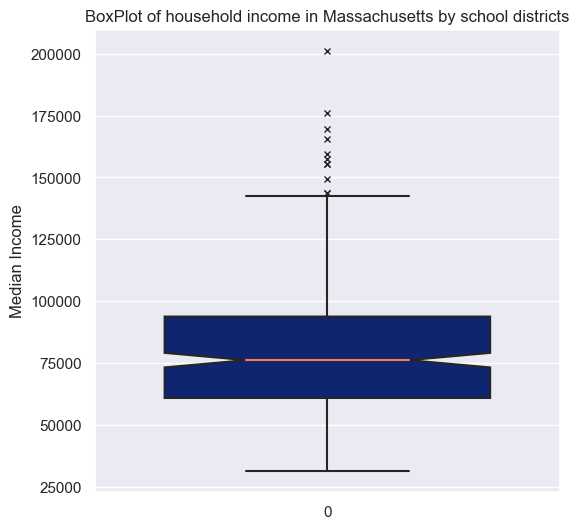

In [127]:
#Boxplot Block
sns.boxplot(data= house['MedianIncome'], palette= 'dark',notch=True,width=0.7 ,showcaps=True, flierprops={"marker": "x"},medianprops={"color": "coral"})
plt.ylabel('Median Income')
sns.set(rc = {'figure.figsize':(6,6)})
plt.title('BoxPlot of household income in Massachusetts by school districts')
plt.show()